# Introducing Scikit-Learn

There are several Python libraries which provide solid implementations of a range of machine learning algorithms.
One of the best known is [Scikit-Learn](http://scikit-learn.org), a package that provides efficient versions of a large number of common algorithms.
Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation.
A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward.

This section provides an overview of the Scikit-Learn API.

We will start by covering *data representation* in Scikit-Learn, followed by covering the *Estimator* API, and finally go through a couple examples.

## Data Representation in Scikit-Learn

Machine learning is about creating models from data: for that reason, we'll start by discussing how data can be represented in order to be understood by the computer.
The best way to think about data within Scikit-Learn is in terms of tables of data.

### Data as table

A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements.
For example, consider the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), famously analyzed by Ronald Fisher in 1936.
We can download this dataset in the form of a Pandas ``DataFrame`` using the [seaborn](http://seaborn.pydata.org/) library:

In [1]:
from IPython.display import Pretty as disp
hint = 'https://raw.githubusercontent.com/soltaniehha/Business-Analytics/master/docs/hints/'  # path to hints on GitHub
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

<img src="https://github.com/soltaniehha/Business-Analytics/blob/master/figs/10-02-Petal-sepal.jpg?raw=true" width="300" align="center"/>

In [3]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Here each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset.
In general, we will refer to the rows of the matrix as *samples*, and the number of rows as ``n_samples``.

Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample.
In general, we will refer to the columns of the matrix as *features*, and the number of columns as ``n_features``.

#### Features matrix

This table layout makes clear that the information can be thought of as a two-dimensional numerical array or matrix, which we will call the *features matrix*.
By convention, this features matrix is often stored in a variable named ``X``.
The features matrix is assumed to be two-dimensional, with shape ``[n_samples, n_features]``, and is most often contained in a NumPy array or a Pandas ``DataFrame``.

The samples (i.e., rows) always refer to the individual objects described by the dataset.
For example, the sample might be a flower, a person, a document, an image, a sound file, a video, an astronomical object, or anything else you can describe with a set of quantitative measurements.

The features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner.
Features are generally real-valued, but may be Boolean or discrete-valued in some cases.

#### Target array

In addition to the feature matrix ``X``, we also generally work with a *label* or *target* array, which by convention we will usually call ``y``.
The target array is usually one dimensional, with length ``n_samples``, and is generally contained in a NumPy array or Pandas ``Series``.
The target array may have continuous numerical values, or discrete classes/labels.
While some Scikit-Learn estimators do handle multiple target values in the form of a two-dimensional, ``[n_samples, n_targets]`` target array, we will primarily be working with the common case of a one-dimensional target array.

Often one point of confusion is how the target array differs from the other features columns. The distinguishing feature of the target array is that it is usually the quantity we want to *predict from the data*: in statistical terms, it is the dependent variable.
For example, in the preceding data we may wish to construct a model that can predict the species of flower based on the other measurements; in this case, the ``species`` column would be considered the target array.

With this target array in mind, we can use Seaborn (see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)) to conveniently visualize the data:

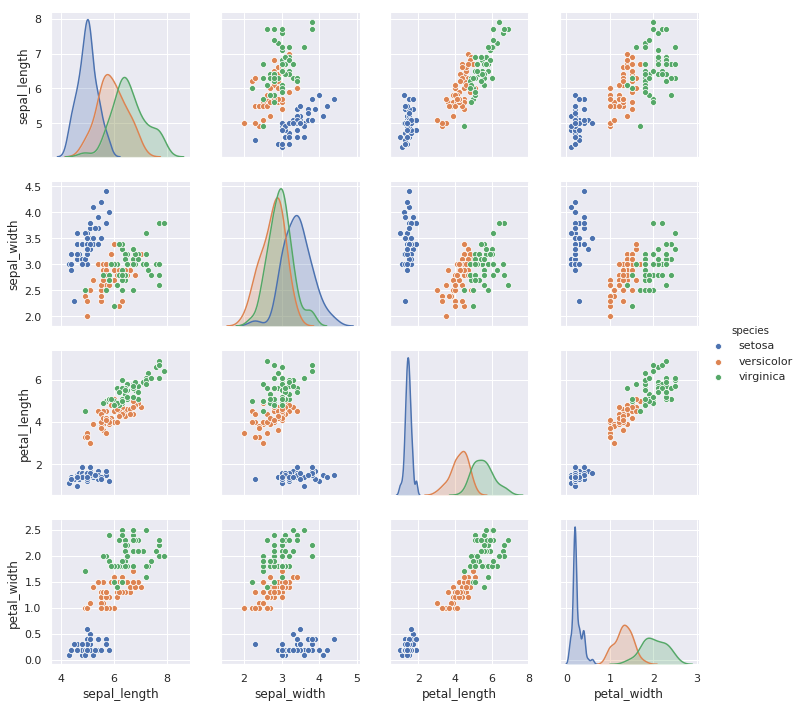

In [4]:
%matplotlib inline
sns.set(rc={'figure.figsize':(10,8)})  # Figure size

sns.pairplot(iris, hue='species', height=2.5);

For use in Scikit-Learn, we will extract the features matrix and target array from the ``DataFrame``, which we can do using some of the Pandas ``DataFrame`` operations we've learned:

In [5]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [6]:
y_iris = iris['species']
y_iris.shape

(150,)

To summarize, the expected layout of features and target values is visualized in the following diagram:

<img src="https://github.com/soltaniehha/Business-Analytics/blob/master/figs/10-02-samples-features.png?raw=true" width="700" align="center"/>

With this data properly formatted, we can move on to consider the *estimator* API of Scikit-Learn:

## Scikit-Learn's Estimator API

The Scikit-Learn API is designed with the following guiding principles in mind, as outlined in the [Scikit-Learn API paper(2013)](http://arxiv.org/abs/1309.0238):

- *Consistency*: All objects share a common interface drawn from a limited set of methods, with consistent documentation.

- *Inspection*: All specified parameter values are exposed as public attributes.

- *Limited object hierarchy*: Only algorithms are represented by Python classes; datasets are represented
  in standard formats (NumPy arrays, Pandas ``DataFrame``s) and parameter
  names use standard Python strings.

- *Composition*: Many machine learning tasks can be expressed as sequences of more fundamental algorithms,
  and Scikit-Learn makes use of this wherever possible.

- *Sensible defaults*: When models require user-specified parameters, the library defines an appropriate default value.

In practice, these principles make Scikit-Learn very easy to use, once the basic principles are understood.
Every machine learning algorithm in Scikit-Learn is implemented via the Estimator API, which provides a consistent interface for a wide range of machine learning applications.

### Basics of the API

Most commonly, the steps in using the Scikit-Learn estimator API are as follows
(we will step through a couple of detailed examples in the sections that follow).

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the ``fit()`` method of the model instance.
5. Apply the Model to new data:
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.

We will now step through simple examples of applying unsupervised learning methods.

### Unsupervised learning example: Iris dimensionality reduction

As an example of an unsupervised learning problem, let's take a look at reducing the dimensionality of the Iris data so as to more easily visualize it.
Recall that the Iris data is four dimensional: there are four features recorded for each sample.

The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data.
Often dimensionality reduction is used as an aid to visualizing data: after all, it is much easier to plot data in two dimensions than in four dimensions or higher!

Here we will use principal component analysis (PCA), which is a fast linear dimensionality reduction technique.
We will ask the model to return two components—that is, a two-dimensional representation of the data.

Following the sequence of steps outlined earlier, we have:

In [7]:
from sklearn.decomposition import PCA  # 1. Choose the model class
pca = PCA(n_components=2)              # 2. Instantiate the model with hyperparameters
pca.fit(X_iris)                        # 3. Fit to data. Notice y is not specified!
X_2D = pca.transform(X_iris)           # 4. Transform the data to two dimensions

In [8]:
print(X_2D[:5,])
print('\nX_2D type:', type(X_2D))
print('Shape:', X_2D.shape)

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]

X_2D type: <class 'numpy.ndarray'>
Shape: (150, 2)


Now let's plot the results. A quick way to do this is to insert the results into the original Iris ``DataFrame``, and use Seaborn's ``lmplot`` to show the results:

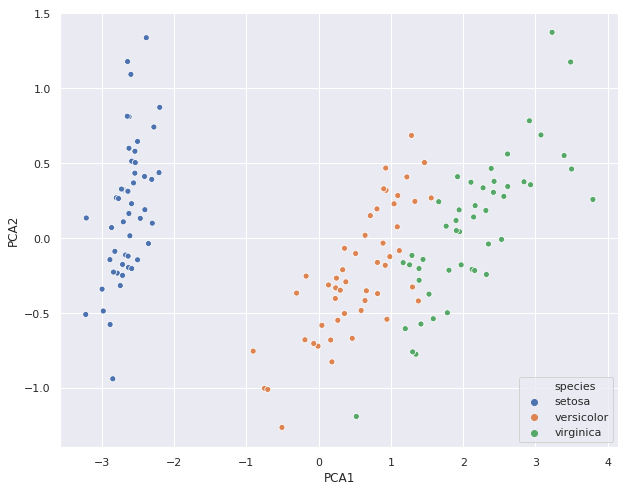

In [9]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.scatterplot("PCA1", "PCA2", hue='species', data=iris);

We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels!
This indicates to us that a relatively straightforward classification will probably be effective on the dataset, as we saw before.

### Unsupervised learning: Iris clustering with *k*-means

Let's next look at applying clustering to the Iris data.
A clustering algorithm attempts to find distinct groups of data without reference to any labels.
Here we will use a simple clustering method called a *k*-means clustering (*k*-means).

The *k*-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset.
It accomplishes this using a simple conception of what the optimal clustering looks like:

- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

We can fit the k-means model as follows:

In [10]:
from sklearn.cluster import KMeans  # 1. Choose the model class
kmeans = KMeans(n_clusters=3, 
                random_state=833)   # 2. Instantiate the model with hyperparameters
kmeans.fit(X_iris)                  # 3. Fit to data. Notice y is not specified!
y_kmeans = kmeans.predict(X_iris)   # 4. Transform the data to two dimensions

In [11]:
iris['cluster'] = y_kmeans
iris.head()

sepal_length  sepal_width  petal_length  petal_width species      PCA1  \
0           5.1          3.5           1.4          0.2  setosa -2.684126   
1           4.9          3.0           1.4          0.2  setosa -2.714142   
2           4.7          3.2           1.3          0.2  setosa -2.888991   
3           4.6          3.1           1.5          0.2  setosa -2.745343   
4           5.0          3.6           1.4          0.2  setosa -2.728717   

       PCA2  cluster  
0  0.319397        1  
1 -0.177001        1  
2 -0.144949        1  
3 -0.318299        1  
4  0.326755        1

By splitting the data by cluster number, we see exactly how well the _k_-means algorithm has recovered the underlying label: the *setosa* species is separated perfectly within cluster 1, while there remains a small amount of mixing between *versicolor* and *virginica*.
This means that even without an expert to tell us the species labels of the individual flowers, the measurements of these flowers are distinct enough that we could *automatically* identify the presence of these different groups of species with a simple clustering algorithm!
This sort of algorithm might further give experts in the field clues as to the relationship between the samples they are observing.

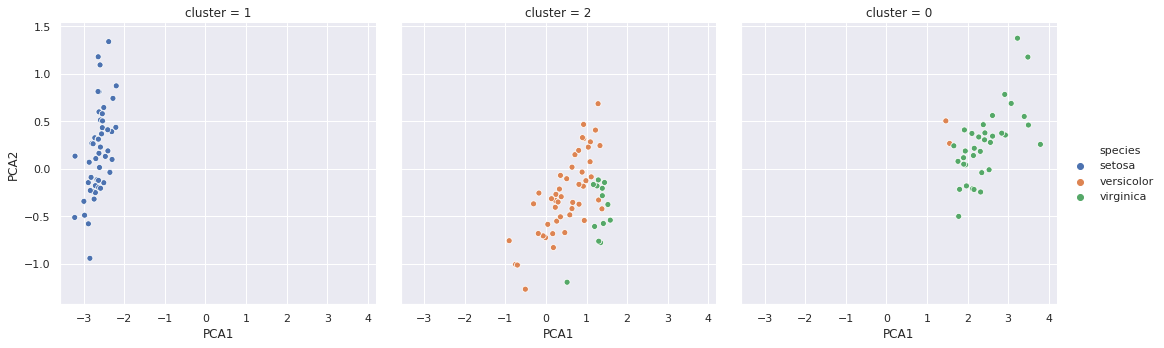

In [12]:
sns.relplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', col_order=[1,2,0]);

We will also plot the cluster centers as determined by the k-means estimator (and after transforming them to the appropriate PCA dimensions) by diamond signs:

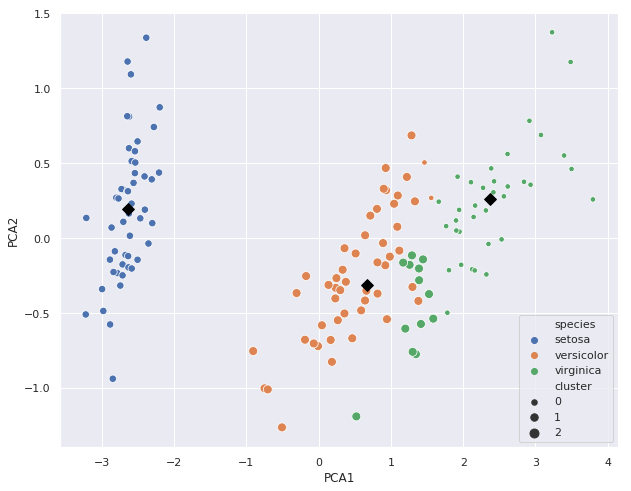

In [13]:
sns.scatterplot("PCA1", "PCA2", data=iris, hue='species', size='cluster', sizes=(30,80));

centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], color='black', s=70, marker='D');

The good news is that the *k*-means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye. 

# Your turn

Going back to the "tips" dataset, let's use *k*-means algorithm to divid the customers into clusters. 

But first let's load the data:

In [14]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Then add two new columns to this dataset: 1) tip percent 2) bill paid per person

In [15]:
tips['tip_percent'] = tips['tip'] / tips['total_bill']
tips['bill_per_person'] = tips['total_bill'] / tips['size']
tips.head()

total_bill   tip     sex smoker  day    time  size  tip_percent  \
0       16.99  1.01  Female     No  Sun  Dinner     2     0.059447   
1       10.34  1.66    Male     No  Sun  Dinner     3     0.160542   
2       21.01  3.50    Male     No  Sun  Dinner     3     0.166587   
3       23.68  3.31    Male     No  Sun  Dinner     2     0.139780   
4       24.59  3.61  Female     No  Sun  Dinner     4     0.146808   

   bill_per_person  
0         8.495000  
1         3.446667  
2         7.003333  
3        11.840000  
4         6.147500

Using `pairplot` function plot the panel of charts to reveal relationships between variables:

In [16]:
# Your answer goes here


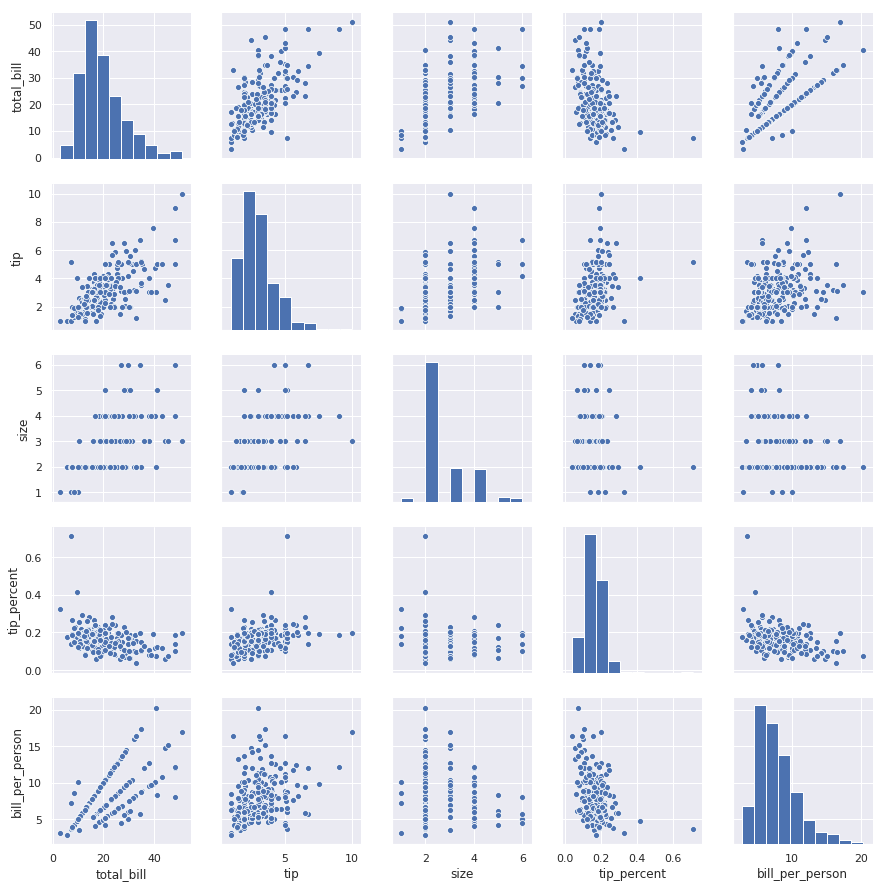

In [17]:
# Don't run this cell to keep the outcome as your frame of reference

In [18]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '10-02-pairplot')

Create `X_tips` DataFrame, a subset of "tips" that every thing but the following columns: ['sex', 'smoker', 'day', 'time']

In [19]:
# Your answer goes here

In [20]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '10-02-xtips')

In [21]:
X_tips.head()

total_bill   tip  size  tip_percent  bill_per_person
0       16.99  1.01     2     0.059447         8.495000
1       10.34  1.66     3     0.160542         3.446667
2       21.01  3.50     3     0.166587         7.003333
3       23.68  3.31     2     0.139780        11.840000
4       24.59  3.61     4     0.146808         6.147500

In [22]:
X_tips.shape

(244, 5)

Create a `KMeans` model (call it `kmeans`), set the number of clusters to 2 and train/fit it using the entire `X_tips`:

In [23]:
# Your answer goes here

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=833, tol=0.0001, verbose=0)

In [24]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '10-02-kmeans')

Make predictions by using `predict()` method on the model we just trained to generate cluster labels for each data point. Save these values to `y_kmeans`:

In [25]:
# Your answer goes here

In [26]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '10-02-predict')

Make `y_kmeans` a new column of `X_tips` with the name "cluster":

In [27]:
# Your answer goes here

In [28]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '10-02-outcome')

Now that we have a cluster number for each of the datapoints let's visualize our clustering outcome.

Plot the following `pairplot`:

/Users/msoltani/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/msoltani/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/msoltani/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


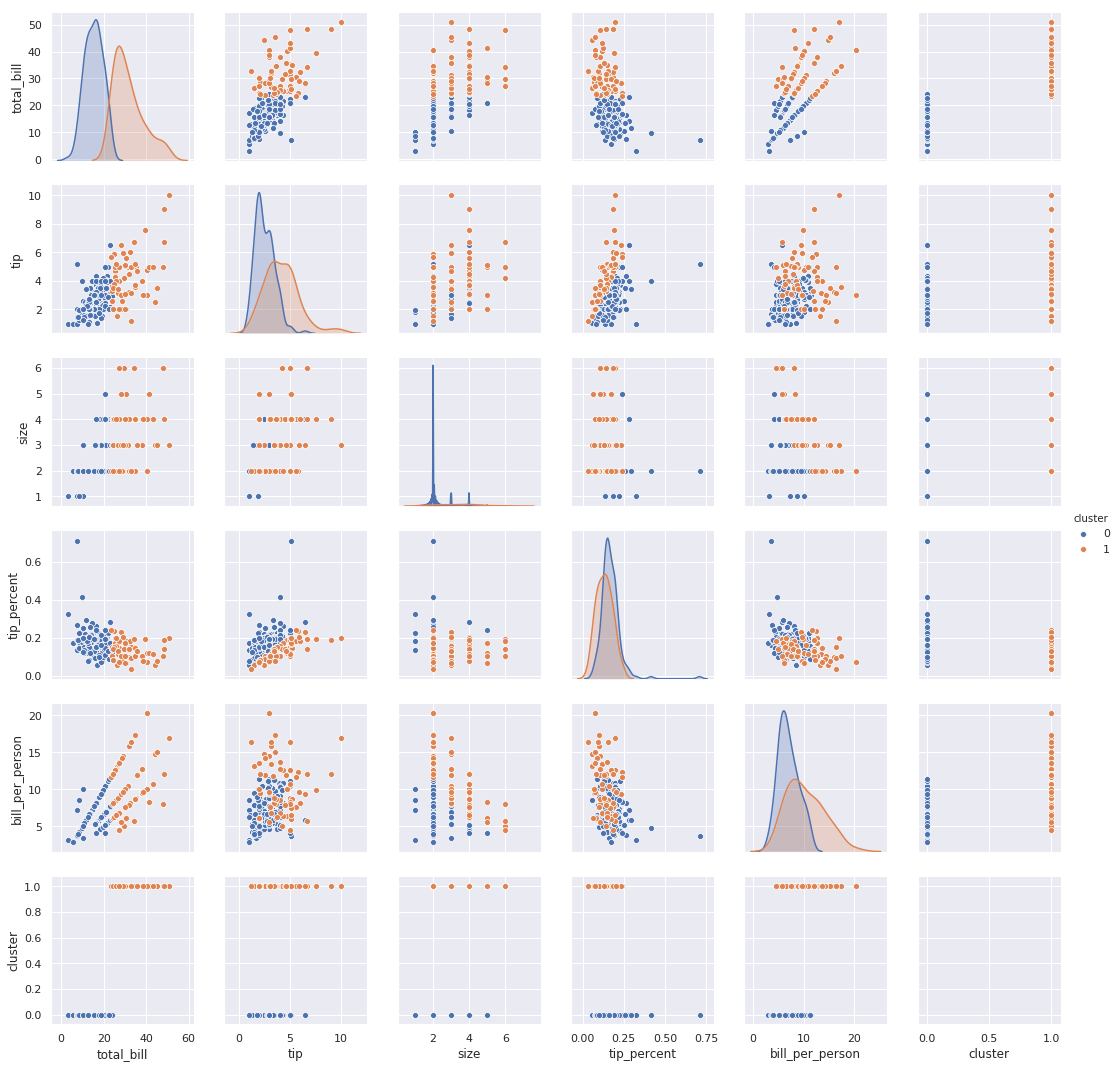

In [29]:
# Your answer goes here

In [30]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '10-02-pairplot2')

* Try different number of clusters and see how these charts change. Which one is your favorite?